## Importing Libraries

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd drive/MyDrive/Depression_Analysis_by_Tweets

/content/drive/MyDrive/Depression_Analysis_by_Tweets


In [9]:
tweets = pd.read_csv('Dataset.csv')
tweets['label'].value_counts()

0    9000
1    1739
Name: label, dtype: int64

## Word Cloud Analysis

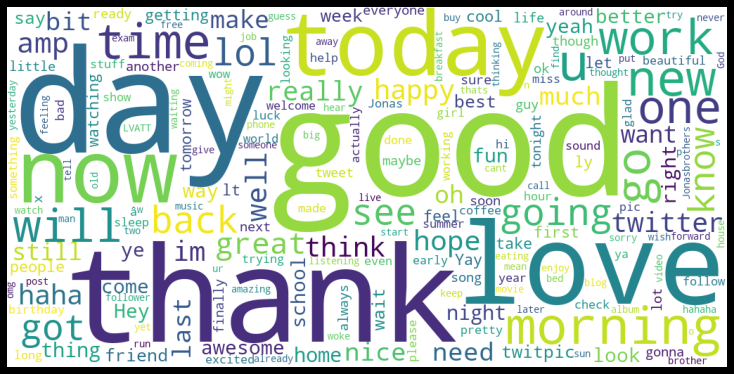

In [20]:
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['tweet']))
positive_wc = WordCloud(background_color='white', width=1024, height=512, collocations=False).generate(positive_words)
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(positive_wc)
plt.axis('off'),
plt.tight_layout(pad=0)
plt.show()

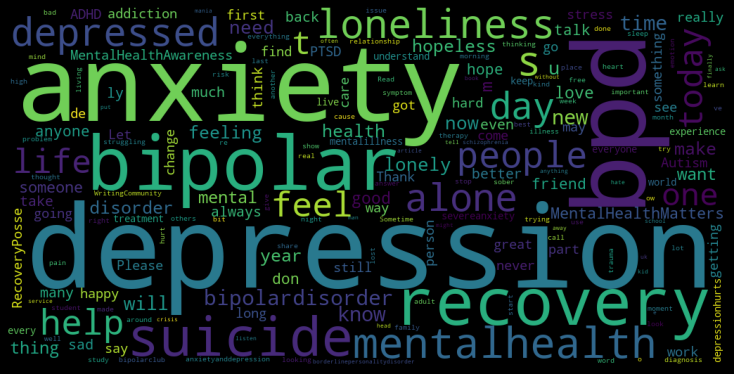

In [21]:
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['tweet']))
depressive_wc = WordCloud(width=1024, height=512, collocations=False).generate(depressive_words)
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Cleaning our dataset by insights we gained from word cloud

In [19]:
to_remove = ["Mohanlal","https","ShajiKails","quot"]
mask1 = tweets.tweet.apply(lambda x: any(item for item in to_remove if item in x))
tweets = tweets[mask1==False]
# I again run the wordcloud and It gave better result this time

# Splitting in Training and Testing dataset
Dividing the dataset up with a 70:30 split between the training and testing data

In [22]:
tweets['label'].value_counts()

0    8744
1    1278
Name: label, dtype: int64

In [23]:
totalTweets = 8744 + 1278
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.7:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [24]:
trainData['label'].value_counts()

0    6101
1     914
Name: label, dtype: int64

In [25]:
testData['label'].value_counts()

0    2643
1     364
Name: label, dtype: int64

In [27]:
trainData.to_csv('train.csv')
testData.to_csv('test.csv')